# CM50268 :: Final project

**Total Marks 25 (25% of overall unit grade).** 

*Submission deadline: 8pm, May 10, 2022. Please submit this file along with your individual report in Moodle*

## Submission & Marking

This exercise is assessed, and the marks will contribute to your final grade. For this exercise there are a number of places where you are expected to enter your own code. Please see the BML Final Project Specification document for details. 

Every place you have to add code is described in the text and specifically indicated by the comment:

`#### **** YOUR CODE HERE **** ####`


**Please submit your completed workbook using Moodle before 8pm on May 10, 2022 along with your individual report**. The workbook you submit must be this `.ipynb` file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (Save and Checkpoint in the File menu, the icon of a floppy disk, or Ctrl-S); the version you submit should have all code blocks showing the results (if any) of execution below them.

**You should take care to avoid any suggestion of plagiarism in your submission.** There is helpful information on how to avoid plagiarism on the University website: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

# Project setup

This coursework involves the evaluation of Bayesian modelling methods on a real multivariate regression task. Please check the pdf file for the details of the project.

- <font color=Red> Please try to use fixed random seeds to make your results reproducible </font>

- <font color=Red> Please do NOT change the name of the fixed variables, as Task 2 - Task 5 of this coding exercises are auto-marked </font>

The marks for Task 1 will be awarded based only on the content of the report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import hmc_Lab as hmc

# import hmc_Lab as hmc

# Task 1 : Exploratory analysis (Section 4.1 in the specification doc)

Undertake an initial exploratory analysis of the training data and summarise. Code in Task 1 will NOT by auto-marked. Results of Task 1 will be assessed along with your individual report, i.e., 4 marks in total. 

 - <font color=Red> Please perserve the variables `X_train` and  `y_train` representing the normalised data in numpy array, as required for the following exercises  </font>

 - `X_train` is an np.array with shape (384, 9). The 1st column is a constant (bias) $x_0$ and the 2nd to the 9th columns are data variables $x_1,x_2,\dots,x_8$

 - `y_train` is also an np.array with shape (384,), representing the target variable $y$ 

In [2]:
#### **** YOUR CODE HERE **** ####  
#### **** YOUR CODE HERE **** ####  
df = pd.read_csv("ee-train.csv")

y_train_df = df.iloc[:,-1].copy()
X_train_df = df.iloc[:,:-1].copy()

#Standardising fitted using X_train
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_df) 

# normalised X_train dataframe for EDA
X_train_df_tr = pd.DataFrame(scaler.transform(X_train_df),columns=[i for i in df.columns[0:9]]) 

X_train_df_tr.loc[:,"const"] = 1 #bias = 1
X_train_df_tr["Heat load"] = y_train_df #adding "Heat load" for EDA (not standardised)
display(X_train_df_tr)

df_test = pd.read_csv("ee-test.csv")

# extracting y and X from test dataset

y_test_df = df_test.iloc[:,-1].copy()
X_test_df = df_test.iloc[:,:-1].copy()

# normalising of test data, and converting to array

X_test = scaler.transform(X_test_df) 
X_test[:,0]=1 # bias = 1

# converting normalised X_train_df to array

X_train = X_train_df_tr[[i for i in df.columns[0:9]]].to_numpy() 

#converting y_df to arrays

y_train = y_train_df.to_numpy() #
y_test = y_test_df.to_numpy()

# Initial Dataset
print('Initial Dataset: ')
display(df.head(5))
print('Descriptive Statistics: ')
display(df.describe())
print('Number of NaNs: ', df.isna().sum().sum())

#correlation matrix 

# X_train

#### **** You can add extra cells to illustrate your results **** ####  
#### **** You can add extra cells to illustrate your results **** ####  

,const,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heat load
0,1,-1.419379,1.620372,1.168865,1.042621,-1.075780,-0.489351,-1.027918,1.415648,12.74
1,1,1.211856,-1.161134,0.007561,-1.145174,0.929558,-0.489351,-1.027918,-0.500717,29.68
2,1,1.211856,-1.161134,0.007561,-1.145174,0.929558,-0.489351,1.225481,-0.500717,36.57
3,1,0.178157,-0.326682,0.588213,-0.598225,0.929558,-1.401540,0.098782,-0.500717,38.57
4,1,1.211856,-1.161134,0.007561,-1.145174,0.929558,0.422837,1.225481,1.415648,34.72
...,...,...,...,...,...,...,...,...,...,...
379,1,-1.419379,1.620372,1.168865,1.042621,-1.075780,0.422837,1.225481,-1.139505,17.14
380,1,-1.231434,1.342221,0.588213,1.042621,-1.075780,1.335026,0.098782,-0.500717,17.11
381,1,-1.419379,1.620372,1.168865,1.042621,-1.075780,1.335026,-1.027918,0.138071,12.73
382,1,-0.573625,0.507770,-1.153744,1.042621,-1.075780,0.422837,0.098782,0.138071,12.10


Initial Dataset: 


,const,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,1,0.62,808.5,367.5,220.5,3.5,3,0.10,5,12.74
1,1,0.90,563.5,318.5,122.5,7.0,3,0.10,2,29.68
2,1,0.90,563.5,318.5,122.5,7.0,3,0.40,2,36.57
3,1,0.79,637.0,343.0,147.0,7.0,2,0.25,2,38.57
4,1,0.90,563.5,318.5,122.5,7.0,4,0.40,5,34.72


Descriptive Statistics: 


,const,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,384.0,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,1.0,0.771042,665.774740,318.180990,173.796875,5.377604,3.536458,0.236849,2.783854,22.920703
std,0.0,0.106553,88.196712,42.248972,44.852410,1.747619,1.097695,0.133306,1.567506,10.066099
min,1.0,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.400000
25%,1.0,0.690000,588.000000,294.000000,140.875000,3.500000,3.000000,0.100000,1.000000,14.057500
50%,1.0,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000,23.605000
75%,1.0,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,32.052500
max,1.0,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000


Number of NaNs:  0


## ⭐ 1.1 Correlation Heatmap
1. For all variables 
2. For heating load

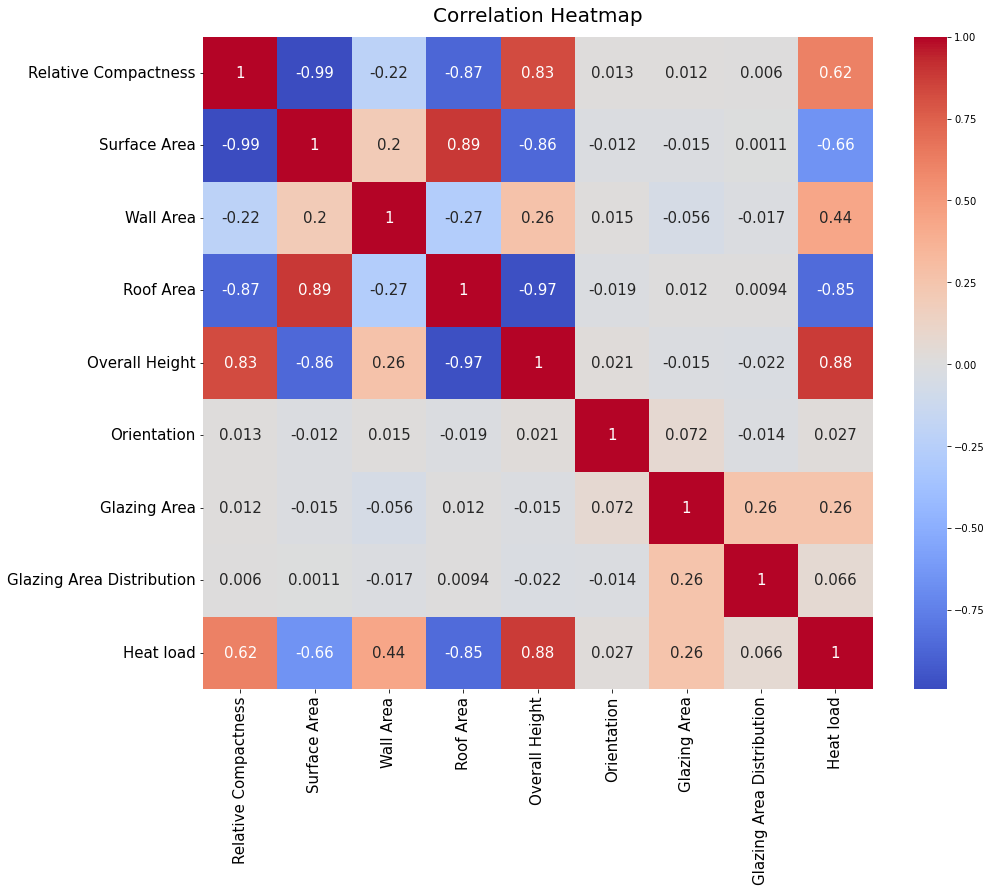

In [3]:

plt.figure(figsize=(15, 12))
df_corr = X_train_df_tr.loc[:, X_train_df_tr.columns != 'const']  # Exclude bias
corr_heatmap = sns.heatmap(df_corr.corr(), annot = True, cmap='coolwarm', annot_kws={"fontsize":15})
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

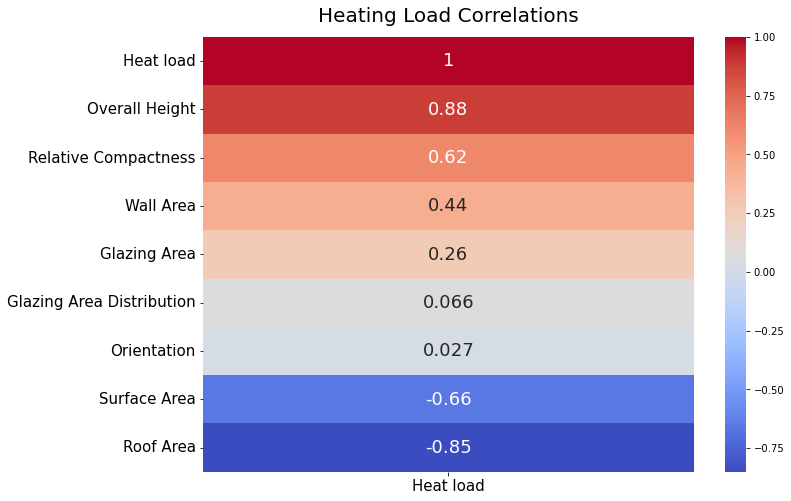

In [4]:
plt.figure(figsize=(11, 8))
HL_corr = sns.heatmap(df_corr.corr()[['Heat load']].sort_values(by='Heat load', ascending=False), annot=True, cmap='coolwarm', annot_kws={"fontsize":18})
HL_corr.set_title('Heating Load Correlations', fontdict={'fontsize':20}, pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

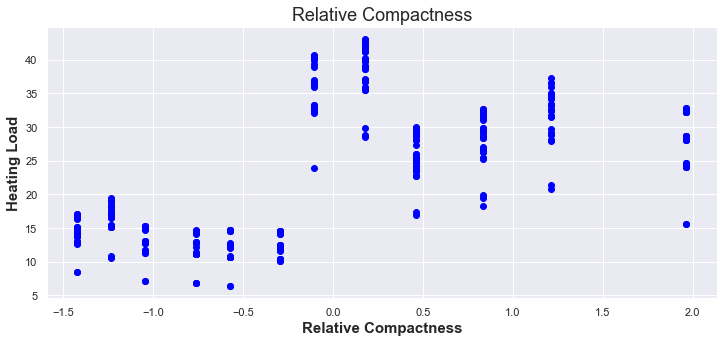

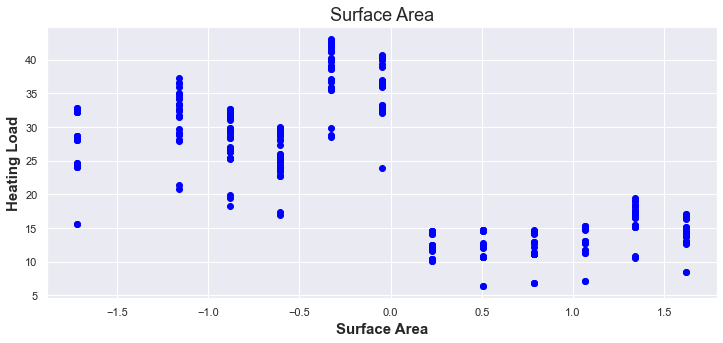

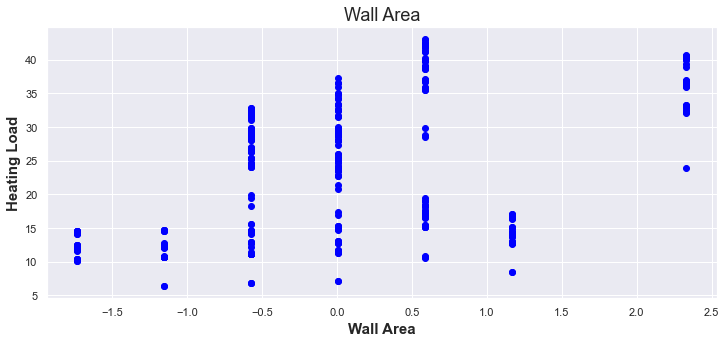

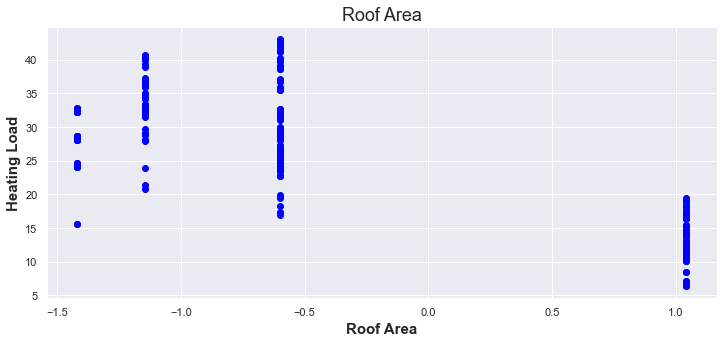

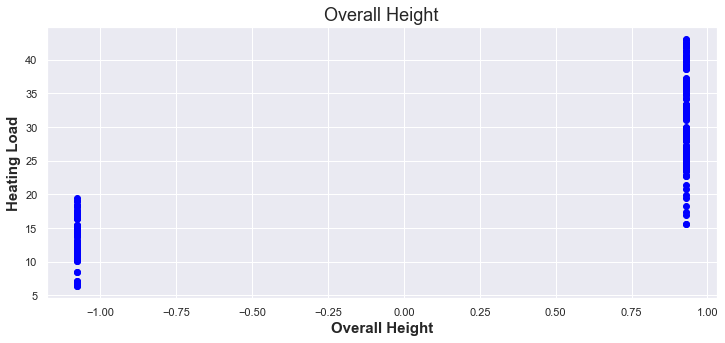

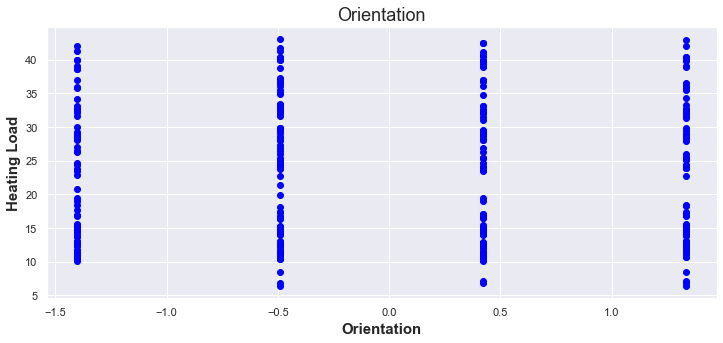

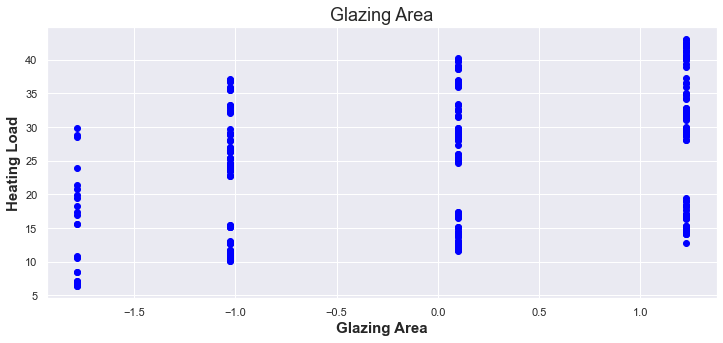

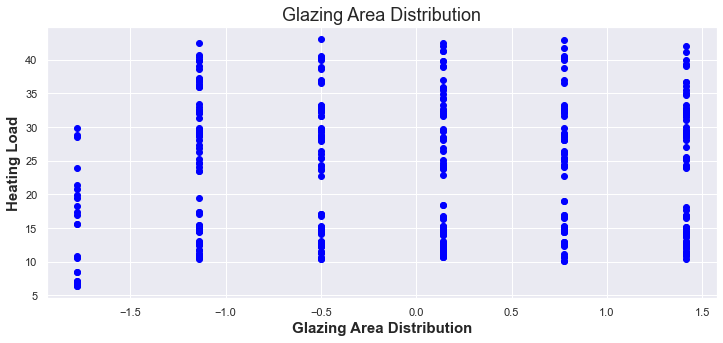

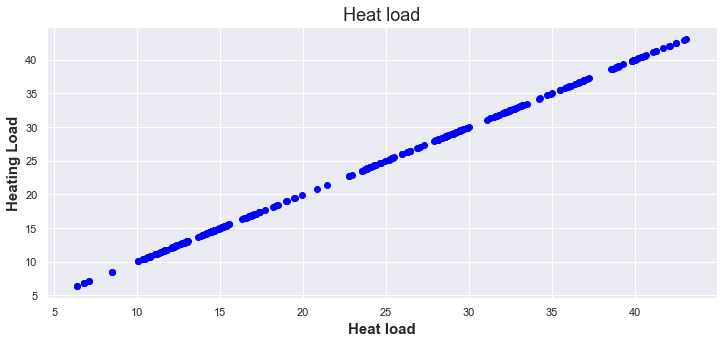

In [5]:
# Check for Linearity
def plot_corr(df1):

    print('\n')
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(12,5))
    plt.scatter(df1, df['Heating Load'], c = 'blue')
    plt.xlabel(df1.name, size=15, weight='bold')
    plt.ylabel('Heating Load', size=15, weight='bold')
    plt.title(f'{df1.name}', size=18)
    plt.show()

for col in df_corr.columns:
    plot_corr(X_train_df_tr[col])

## ⭐ 1.3 OLS solution 

b_hat = (X'X)^(-1)*X'y 

y_hat = X*b

MAE 

(\Sum |y_hat - y|)/n

In [6]:
class OLS():
    def __init__(this,X,y):
        '''
        X : is the data matrix
        y : is the prediction vector
        '''
        this.X = X
        this.y = y

    def fit(this):
        '''
        Calculate coefficient b
        '''
        this.b = np.linalg.pinv(this.X.T @ this.X) @ this.X.T @ this.y
        return this

    def predict(this, X=None):
        '''
        X: is the data matrix
        b: LS coefficient estimates
        returns y_hat (y predictions)
        '''
        if X is None:
            X = this.X
        
        this.y_hat = X @ this.b
        return this

    def MAE(this, y=None):
        if y is None:
            y = this.y
        return np.abs(np.subtract(y, this.y_hat)).mean()

    def RMSE(this,y=None):
        if y is None:
            y = this.y
        return mean_squared_error(y,this.y_hat,squared = False)

cols = X_train_df.columns
ols = OLS(np.array(X_train), np.array(y_train))
for i in range(len(ols.fit().b)):
    print("{} coefficient = {}".format(cols[i],round(ols.fit().b[i],3)))
print()
print("******* MAE & RMSE For Training data ********")
print("MAE: ",ols.fit().predict().MAE())#
print("RMSE: ",ols.fit().predict().RMSE())#

print("******* MAE & RMSE For Test data ********")
print("MAE: ",ols.predict(np.array(X_test)).MAE(np.array(y_test)))
print("RMSE: ",ols.predict(np.array(X_test)).RMSE(np.array(y_test)))


const coefficient = 22.921
Relative Compactness coefficient = -7.235
Surface Area coefficient = -3.942
Wall Area coefficient = 0.756
Roof Area coefficient = -4.232
Overall Height coefficient = 7.204
Orientation coefficient = -0.125
Glazing Area coefficient = 2.77
Glazing Area Distribution coefficient = 0.204

******* MAE & RMSE For Training data ********
MAE:  2.1306794414069277
RMSE:  3.0115517876503617
******* MAE & RMSE For Test data ********
MAE:  2.0690100938083695
RMSE:  2.8435880167333742


In [7]:
# Check whether fixed variables are correctly defined ..
try:
    if not isinstance(X_train,np.ndarray):
        print('X_train should be an array')        
    if X_train.shape != (384,9):
        print('X_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(y_train,np.ndarray):
        print('y_train should be an array')        
    if y_train.shape != (384,):
        print('y_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

#  Task 2 : Type-2 maximum likelihood (Section 4.2 (a) in the specification doc)

###  **(6 marks)**

Precisions are defined as: $\alpha = 1 / \sigma_w^2$ and $ \beta = 1 / \sigma_{\epsilon}^2 $

Assume priors of $\alpha$ and $\beta$ follow flat Uniform distributions, please derive a likelihood function $(y|\alpha, \beta)$ (`compute_log_marginal`) to compute the *log-ikelihood* for the Bayesian linear regression problem using $X$ and hyperparameters $\alpha$ and $\beta$. 

In Lecture 4, slide 11 and 12 we have illustrated the equations of finding the most probable hyperparameters to maximise the likelihood with respect to the hyperparameters (slide 12).


`X`: this is an np.array equivalent to matrix $X$ in the specification doc, e.g., `X_train`, `X_test`.

`y`: this is an np.array equivalent totarget $y$ in the specification doc, e.g., `y_train`, `y_test`.


In [8]:
## Compute log-likelihood

def compute_log_marginal(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####   
    N, M = X.shape

    C = (1/beta) * np.eye(N) + (X @ X.T) / alph

    lgp = stats.multivariate_normal.logpdf(y.T, mean=None, cov=C, allow_singular=True)
    return lgp

Compute log-evidence (marginal likelihood) `log_prob_y` and plot the 'contourf' of the log-posterior distribution.

- The x-axis should be the value of $log \alpha$ and y-axis the $log\beta$, `log_prob_y` represents the log-evidence. For each axis, it is recommended to use 
`np.linspace(-5,0,100)`

- It is strongly recommended that you use only natural logarithms for hyper-parameter scales. That is, you would use `numpy.exp()` and `numpy.log()` functions to convert (or to convert back) the logarithm terms.

In [9]:
#### **** YOUR CODE HERE **** ####   

log_a = np.linspace(-5,0,100)
a = np.exp(log_a)
log_b = np.linspace(-5,0,100)
b = np.exp(log_b)
log_prob_y = np.zeros([100,100])
for i in range(len(log_a)):
    for j in range(len(log_b)):
        log_prob_y[i][j] = compute_log_marginal(X_train,y_train,a[i],b[j])
# Check whether your variables are correctly defined ..
try:
    if not isinstance(log_prob_y,np.ndarray):
        print('log_prob_y should be an array')        
    if log_prob_y.shape != (100,100):
        print('log_prob_y is arranged in a wrong shape')
except Exception as err:
    print('Error output:', err)

Print out the most proboble values of the parameters $\alpha$ and $\beta$ and the corresponding log-likelihood value.

In [10]:
#### **** YOUR CODE HERE **** ####
m_log = log_prob_y.max()
index = []
for i in np.where(log_prob_y == m_log):
    index.append(i[0])
print(a[index[0]],"Is the most probable value for alpha")
print(b[index[1]],"Is the most probable value for beta")
print("The max log-likelihood/log like-hood with the above combination of Alpha and Beta is: ",m_log)

0.01174362845702136 Is the most probable value for alpha
0.10836802322189586 Is the most probable value for beta
The max log-likelihood/log like-hood with the above combination of Alpha and Beta is:  -1001.4576252255207


Visualisation using `plt.contourf`for the posterior distribution and indicate the most probable value (with a highlighted marker) in the graph.

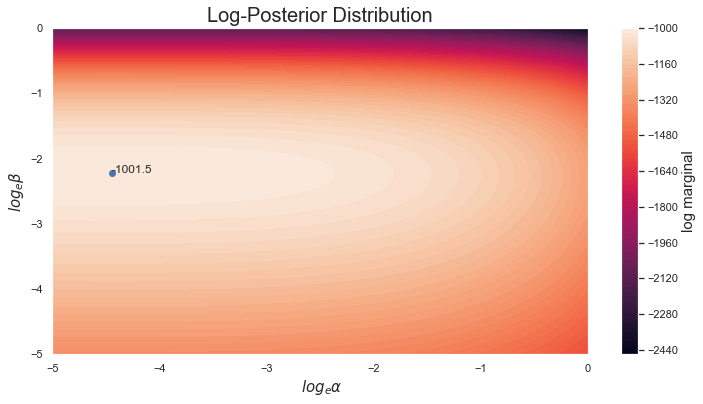

In [11]:
#### **** YOUR CODE HERE **** ####   
fig1,ax = plt.subplots()
fig1.set_figheight(6)
fig1.set_figwidth(12)
cb=ax.contourf(log_a,log_b,log_prob_y.T,levels =80)
ax.set_title("Log-Posterior Distribution", size=20)
ax.set_xlabel(r" $log_{e}\alpha$", size=15)
ax.set_ylabel(r"$log_{e}\beta$", size=15)
cbar = fig1.colorbar(cb)
cbar.ax.set_ylabel("log marginal", size=15)
ax.scatter(log_a[index[0]],log_b[index[1]])
ax.annotate(round(m_log,1),(log_a[index[0]],log_b[index[1]]))
plt.show()


Write a function `compute_posterior(X, y, alph, beta)`  to compute the posterior mean $\mathbf{\mu}$ (`Mu`) and covariance $\mathbf{\Sigma}$ (`SIGMA`) for the Bayesian linear regression model, and return `Mu` and `SIGMA` for the posterior in the np.array format. 

In [12]:
def compute_posterior(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####
    M = X.shape[1]
    H = beta*(X.T @ X) + alph*np.eye(M)
    SIGMA = np.linalg.inv(H)
    Mu = beta * (SIGMA @ (X.T @ y))
    return Mu, SIGMA

Calculate the predicted weights and print out the corresponding RMSE for training and test sets.

In [13]:
#### **** YOUR CODE HERE **** ####
mu,sigma = compute_posterior(X_train,y_train,a[index[0]],b[index[1]])

y_train_pred = np.dot(X_train,mu)
y_test_pred = np.dot(X_test,mu)
train_rmse=mean_squared_error(y_train,y_train_pred,squared = False)
test_rmse=mean_squared_error(y_test,y_test_pred,squared = False)
train_mae = mean_absolute_error(y_train,y_train_pred)
test_mae = mean_absolute_error(y_test,y_test_pred)

cols=X_train_df.columns
for i in range(len(mu)):
    print(" {} coefficient = {}".format(cols[i],round(mu[i],3)))
print()
print("******* Train data errors ********")

print("Training RMSE:",round(train_rmse,3))
print("Training MAE",round(train_mae,3))
print()
print("******* Test data errors ********")

print("Test RMSE:",round(test_rmse,3))
print("Test MAE",round(test_mae,3))


 const coefficient = 22.914
 Relative Compactness coefficient = -6.933
 Surface Area coefficient = -3.735
 Wall Area coefficient = 0.804
 Roof Area coefficient = -4.051
 Overall Height coefficient = 7.294
 Orientation coefficient = -0.126
 Glazing Area coefficient = 2.771
 Glazing Area Distribution coefficient = 0.203

******* Train data errors ********
Training RMSE: 3.012
Training MAE 2.13

******* Test data errors ********
Test RMSE: 2.843
Test MAE 2.067


# Task 3: Variational Inference (Section 4.2 (b) in the specification doc)

###  **(4 marks)**

Write a Variational Inference function `VI(X_train, Y_train)` and return parameter estimates. 

The returned terms should include:

`an`, `bn`, `cn`, `dn`: float

`mn_n`: np.array, shape = (9,),

`sig_n`: np.array, shape = (9,9),

where

`an` and `bn` are the hyper-parameters for $w\propto  N(w|0,\alpha)$,  $\alpha\propto Gamma(\alpha|a,b) $. 

`cn` and `dn` are the hyper-parameters for gaussian noise $N(0,\beta)$,  $\beta\propto Gamma(\beta|c,d) $.

`mn_n` and `sig_n` are the mean $\mathbf{\mu}$ and covariance $\mathbf{\Sigma}$ of the posterior distribution w.r.t. $w$ (in this task) for the Bayesian linear regression model.

The corresponding derivations should be completed in your report.



In [14]:
def VI(X_train, Y_train):
    #### **** YOUR CODE HERE **** ####

    X, y = X_train, Y_train
    a0, b0, c0, d0 = 1e-2, 1e-4, 1e-2, 1e-4
    
    N, D = X.shape
    an = a0 + N/2
    cn = c0 + D/2
    
    L_last = -np.inf
    max_iter = 100
    beta = c0/d0
    
    for i in range(max_iter):
        V = np.linalg.inv(beta * np.eye(D) + X.T @ X)
        w = V @ X.T @ y
        sse = np.sum((X @ w - y)**2)
        bn = b0 + 0.5 * (sse + beta)
        alpha = an/bn
        
        dn = d0 + 0.5 * (alpha * (w.T @ w) + np.trace(V))
        beta = cn/dn
        
        # import ipdb; ipdb.set_trace();
        L = -0.5 * (alpha * sse + np.sum(X * (X @ V))) + 0.5 * np.linalg.slogdet(V)[1] - \
            b0 * alpha + special.gammaln(an) - an * np.log(bn) + an + special.gammaln(cn) - \
            cn * np.log(dn)
        print(L)
        assert L_last < L
            
        if np.abs(L_last - L) < np.abs(0.000001 * L):
            break
        
        L_last = L
    
    print("Coverged after :", i, "interations")
    
    mu_n, sig_n = compute_posterior(X, y, beta, alpha)    
    
    return an,bn,cn,dn, mu_n, sig_n


Print out the expectation of $\alpha$ and $\beta$ as `exp_alpha`,`exp_beta`. 


In [15]:
try:
    an,bn,cn,dn, mu_n, sig_n = VI(X_train, y_train)
except Exception as err:
    print('Error output:', err)
    
#### Print out the expectation of alpha and beta
#### **** YOUR CODE HERE **** ####

exp_alpha = an / bn
exp_beta  = cn / dn
print('best of alpha is: {}'.format(exp_alpha))
print('best of beta is: {}'.format(exp_beta))

-911.7792094095656
-655.754406225635
-654.69918331013
-654.6943428310258
-654.6942907630421
Coverged after : 4 interations
best of alpha is: 0.11025213161689014
best of beta is: 0.10845097501169552


In [16]:
# Check whether your variables are correctly defined  ..
try:
    if not isinstance(mu_n,np.ndarray):
        print('mu_n should be an array')        
    if mu_n.shape != (9,):
        print('mu_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(sig_n,np.ndarray):
        print('sig_n should be an array')        
    if sig_n.shape != (9,9):
        print('sig_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    exp_alpha
    exp_beta
except Exception as err:
    print('Error output:', err)

Calculate the RMSE for training and test sets.

In [17]:
#### **** YOUR CODE HERE **** ####
y_train_pred = X_train@mu_n
err = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
mae_train = np.mean(np.abs(y_train - y_train_pred))
print("*"*10)
print("RMSE for train set:", err)
print("MAE for train set:", mae_train)
print("*"*10)

y_test_pred = X_test@mu_n
err = np.sqrt(np.mean((y_test_pred - y_test) ** 2))
mae_test = np.mean(np.abs(y_test - y_test_pred))
print("*"*10)
print("RMSE for test set:", err)
print("MAE for test set:", mae_test)
print("*"*10)

**********
RMSE for train set: 3.0175874021244176
MAE for train set: 2.1337360683194597
**********
**********
RMSE for test set: 2.848331825340559
MAE for test set: 2.0615773815682688
**********


# Task 4: Verify HMC on a standard 2D Gaussian example (Section 4.3 in the specification doc)

###  **(4 marks)**

## The "Distribution"

Complete the following functions:

- `energy_func(x)`: the energy function, return negative log pdf value in float format
- `energy_grad(x)`: the gradient function returns a numpy array containing the partial derivatives of the energy function with respect to the parameters/hyper-parameters.
- `covar`: Covariance matrix for 2-dimensional gaussian. It is an numpy array with shape (2,2), e.g,  np.array([[1.0875,1],[1,1.0875]]) 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`



In [18]:
def energy_func(x, covar):
    #### **** YOUR CODE HERE **** ####
    neglgp = -stats.multivariate_normal.logpdf(x, [0,0], cov = covar)
    return neglgp

def energy_grad(x, covar):
    #### **** YOUR CODE HERE **** ####
    
    g = np.linalg.inv(covar)@x
    return g



## Visualising the Distribution
Before we run the sampler, let's visualise the distribution over an appropriate
grid of values. Please specify `covar` to plot figures, an naive example of `covar` has been shown below

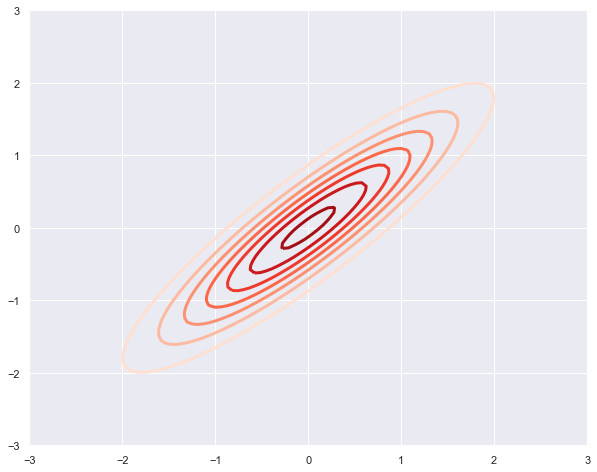

In [19]:

#### **** YOUR CODE BELOW **** ####

covar = np.array([[1,0.9],[0.9,1]]) 

#### **** YOUR CODE ABOVE **** ####

f = 5  # The "frequency" argument for the energy, used here to demonstrate how to use "args"
# Other plotting parameters
fsz = (10,8)
gsz = 100
lim = 3

# Setup the mesh grid

gx = np.linspace(-lim, lim, gsz)
GX, GY = np.meshgrid(gx, gx)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))

# Plot the figure
plt.figure(figsize=fsz)
P = np.asarray([np.exp(-energy_func(g, covar)) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

In [20]:
try:
    if not isinstance(covar ,np.ndarray):
        print('covar  should be an array')        
    if covar .shape != (2,2):
        print('covar  is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

In [21]:
# Initialise the state for the first time step
x0 = np.random.normal(size=2)

# Call the function from the pre-defined hmc module
hmc.gradient_check(x0, energy_func, energy_grad, covar)

Calc.         Numeric       Delta         Acc.
     5.54894       5.54894  -2.060219e-11  12
    -5.09699      -5.09699   1.168132e-10  11


## Hyper-parameters

Please tune optimal hyper-parameters incluidng `R`, `L`, and `eps` in the cell below. 

Calc.         Numeric       Delta         Acc.
     5.54894       5.54894  -2.060219e-11  12
    -5.09699      -5.09699   1.168132e-10  11
|----------|  0% accepted [ 11 secs to go ]
|#---------| 90% accepted [ 10 secs to go ]
|##--------| 91% accepted [ 9 secs to go ]
|###-------| 90% accepted [ 8 secs to go ]
|####------| 90% accepted [ 7 secs to go ]
|#####-----| 90% accepted [ 5 secs to go ]
|######----| 90% accepted [ 4 secs to go ]
|#######---| 90% accepted [ 3 secs to go ]
|########--| 90% accepted [ 2 secs to go ]
|#########-| 90% accepted [ 1 secs to go ]
|##########| 90% accepted [ 0 secs to go ]
HMC: R=10000 / L=100 / eps=0.3925 / Accept=89.8%


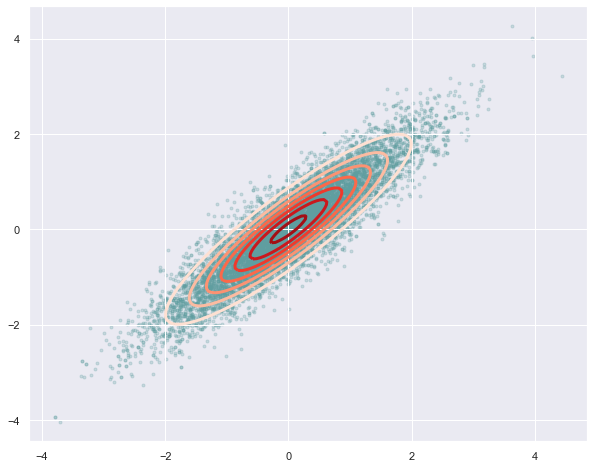

In [22]:
np.random.seed(seed=1)  # Fix the random seed for better reproducibility

#### **** YOUR CODE BELOW **** ####

# R: Number of samples desired (try a few hundred for testing, then perhaps up to 10,000 for quoting results)
R = 10000 
# Number of steps to run the Hamiltonian dynamics within each cycle of the sampler 
# (L = 100 is probably safe, though for the Gaussian example below, 25 should suffice) 
L = 100
# eps: Step-size for the dynamics
# Given choice of L, eps should be set to be as large as possible while keeping
# the acceptance rate of the sampler relatively high, e.g. no lower than 80%
# Note that having an acceptance rate of 100% is not likely to be a good thing.
# That may indicate that eps is too small and the state space is not being properly explored
# One informal approach may therefore be to increase eps until the acceptance
# rate falls below 80%, then ‘dial it back down a little’.
eps = 0.3925
burn = int(R/10) 

#### **** YOUR CODE ABOVE **** ####

# HMC sampling
S, *_ = hmc.sample(x0, energy_func, energy_grad, R, L, eps, burn=burn, checkgrad=True, args=[covar])
# Plot the figure
plt.figure(figsize=fsz)
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

In [23]:
#### **** YOUR CODE HERE **** ####

#### **** You can add extra figures to support the individual report **** ####

# Task 5: Apply HMC to the Linear Regression Model (Section 4.4 in the specification doc)

###  **(8 marks)**

Complete the functions and the HMC code for this task:

- `energy_func_lr(hps, x, y)`: where `hps` is a 2+9 dimension array, where the 1st dimension represents $\alpha$, and the 2nd represnets $\beta$. Thus, `hps[0]` should be the current $\alpha$, `hps[1]` the $\beta$ and `hps[2:]` represent the weights `w` for constant and 8 variables respectively. `x` and `y` is the x and y array of training data.

- `energy_grad_lr(hps, x, y)`: the gradient function returns an array containing the partial derivatives of the energy function. should be the same shape for hps. 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`




In [24]:
def energy_func_lr(hps, x, y):
    #### **** YOUR CODE HERE **** ####
    log_alph = hps[0]
    log_beta = hps[1]
    w = hps[2:]
    n,m = x.shape

    alph = np.exp(log_alph)
    beta = np.exp(log_beta)
    
    log_lik = (n/2) * np.log((beta/2*np.pi)) + (-0.5 * beta * ((y-x@w).T  @  (y-x@w)))
    log_prior = (m/2) * np.log((alph/2*np.pi)) + (-0.5 * alph * (w.T @ w))
    
    neglgp = - (log_lik + log_prior)
    return neglgp

In [25]:
def energy_grad_lr(hps, x, y):
    #### **** YOUR CODE HERE **** ####
    log_alph = hps[0]
    log_beta = hps[1]
    w = hps[2:]

    n,m = x.shape
    
    alph = np.exp(log_alph)
    beta = np.exp(log_beta)

    g     = np.zeros(11)
    g[0]  = -(m/2) + (alph/2) * w.T @ w
    g[1]  = -(n/2) + (beta/2) * (y-x@w).T @ (y-x@w)
    g[2:] = (beta/2) * (-y.T@x -x.T@y + 2*w@x.T@x) + alph * w
    return g

In [26]:
np.random.seed(seed=1) 

#### **** YOUR CODE HERE **** ####

R = 10000
L = 100
eps = 0.01951
burn = int(R/10)

x0     = np.empty(11)
# x0[0]  = 0.1
# x0[1]  = 0.01
x0[0]  = np.random.uniform(-5,0)
x0[1]  = np.random.uniform(-5,0)
x0[2:] = np.random.normal(size=9)
#### you can adjust the hpyer-parameters. 


S, *_ = hmc.sample(x0, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, y_train])

Calc.         Numeric       Delta         Acc.
    -4.13674      -4.13675  -7.254415e-07   7
       36108         36108   2.604604e-06  11
    -2224.08      -2224.08   1.953731e-06  10
     -926.22       -926.22   4.066558e-07  10
     973.914       973.914  -3.617116e-06   9
    -660.774      -660.774   2.411828e-06   9
     1268.74       1268.74  -9.408070e-07  10
    -1288.23      -1288.23  -8.596621e-07  10
    -8.91903      -8.91903   2.027461e-07   8
    -218.028      -218.028   1.906523e-06   9
     76.1408       76.1408  -5.980041e-07   9


c:\Users\remi_\Documents\Data Science MSc\Term 2\Bayesian Machine Learning\Final project\Final Project-20220421\hmc_Lab.py:121: RuntimeWarning: overflow encountered in exp
  if np.random.uniform() < np.exp(current_U-proposed_U+current_K-proposed_K):


|----------|  0% accepted [ 28 secs to go ]
|#---------| 99% accepted [ 25 secs to go ]
|##--------| 99% accepted [ 22 secs to go ]
|###-------| 99% accepted [ 19 secs to go ]
|####------| 99% accepted [ 16 secs to go ]
|#####-----| 99% accepted [ 14 secs to go ]
|######----| 99% accepted [ 11 secs to go ]
|#######---| 99% accepted [ 8 secs to go ]
|########--| 99% accepted [ 5 secs to go ]
|#########-| 99% accepted [ 3 secs to go ]
|##########| 99% accepted [ 0 secs to go ]
HMC: R=10000 / L=100 / eps=0.01951 / Accept=99.4%


## Print out the RMSE and plot figures for your report

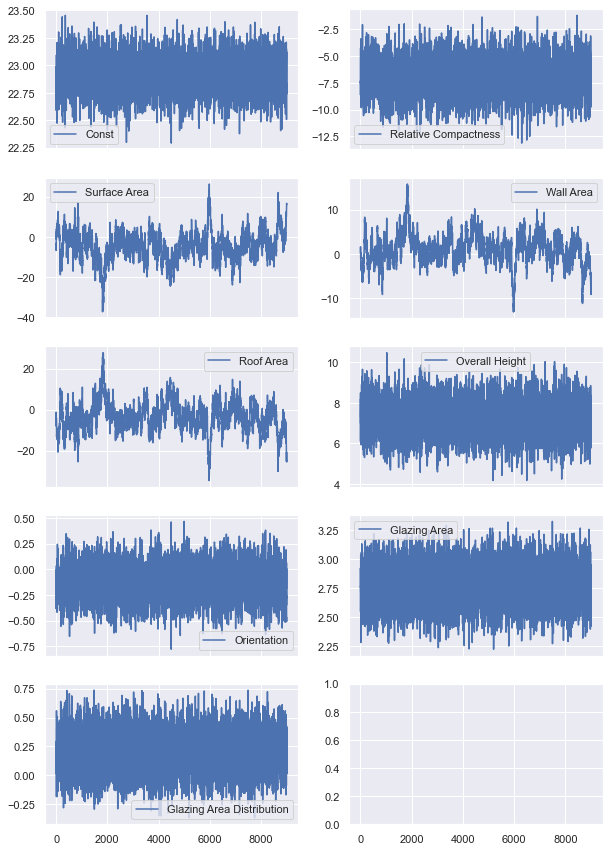

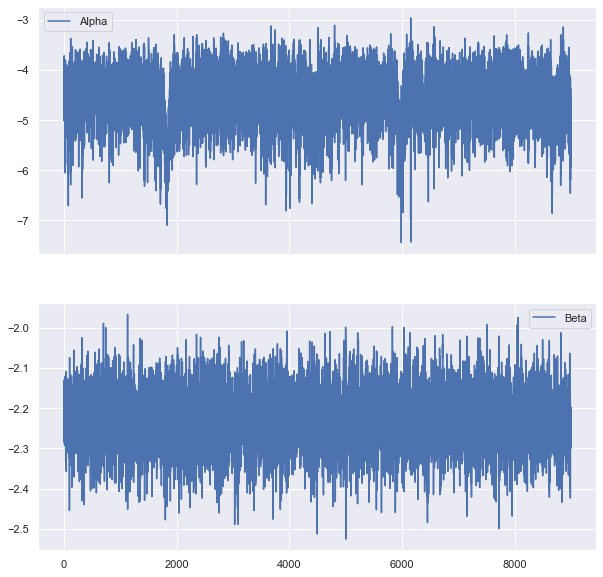

All weights Mae 2.0680410626145798
All weights RMSE: 2.843794233462895
final weights Mae 2.2288937525048276
Final weights rmse: 2.978151406159654
Mean last 10% weighths Mae 2.065559497360987
Mean last 10% weighths rmse 2.842770883013878
Compute posterior w. final alpha and beta Mae 2.0636207136806193
Compute posterior w. final alpha and beta rmse: 2.8610143972406066
Compute posterior w. final alpha and beta Mae 2.062912941785743
Compute posterior w. average last 10% alpha and beta rmse: 2.857757150933613


In [27]:
alphs = S[burn:,0]
betas = S[burn:,1]
weights = S[burn:,2:] # Removing burn in

labels = ['Const', 'Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
t = range(S.shape[0]-burn)
num_weights = weights.shape[1]

fsz = (10, 15)
fig, axs = plt.subplots(5, 2, figsize=fsz, sharex=True)
for i in range(num_weights):
    row = int(i/2)
    col = int(i%2)
    axs[row, col].plot(t, weights[:,i], label=labels[i])
    axs[row, col].legend()

plt.show()

fsz = (10, 10)
fig, axs = plt.subplots(2, figsize=fsz, sharex=True)
axs[0].plot(t, alphs, label='Alpha')
axs[1].plot(t, betas, label='Beta')
axs[0].legend()
axs[1].legend()
plt.show()

AVERAGE_OVER = int(0.1 * R)

#Consider all weights:
y_pred = X_test @ np.mean(weights, axis=0)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
mae_test = np.mean(np.abs(y_test - y_pred))
print('All weights Mae',mae_test)
print('All weights RMSE:', rmse)

#Consider final weight values:
y_pred = X_test @ weights[-1]
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
mae_test = np.mean(np.abs(y_test - y_pred))
print('final weights Mae',mae_test)
print('Final weights rmse:', rmse)

#Consider mean of final 10% of weight values:
y_pred = X_test @ np.mean(weights[-AVERAGE_OVER:-1], axis=0)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
mae_test = np.mean(np.abs(y_test - y_pred))
print('Mean last 10% weighths Mae',mae_test)
print('Mean last 10% weighths rmse', rmse)

#Last alpha, beta values
Mu, SIGMA = compute_posterior(X_train, y_train, alphs[-1], betas[-1])
y_pred = X_test@Mu
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
mae_test = np.mean(np.abs(y_test - y_pred))
print('Compute posterior w. final alpha and beta Mae',mae_test)
print('Compute posterior w. final alpha and beta rmse:', rmse)

#mean of last 10% of alpha, beta values
Mu, SIGMA = compute_posterior(X_train, y_train, np.mean(alphs[-AVERAGE_OVER:-1]), np.mean(betas[-AVERAGE_OVER:-1]))
y_pred = X_test@Mu
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
mae_test = np.mean(np.abs(y_test - y_pred))
print('Compute posterior w. final alpha and beta Mae',mae_test)
print('Compute posterior w. average last 10% alpha and beta rmse:', rmse)



========== HISTOGRAMS ==========


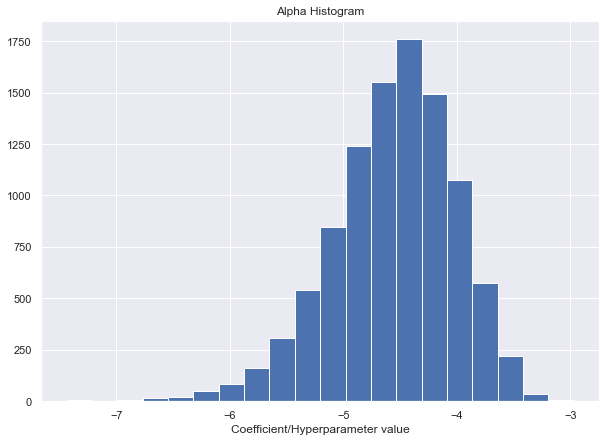

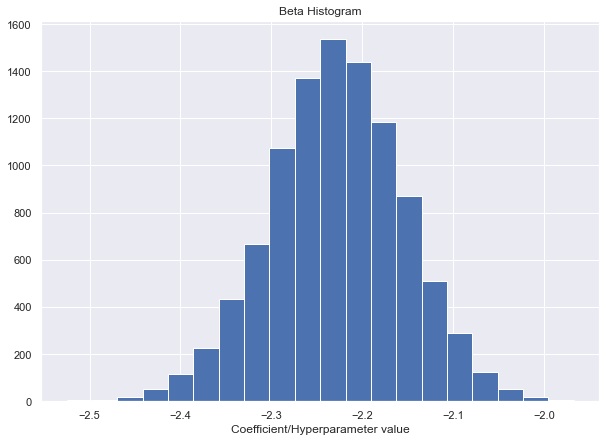

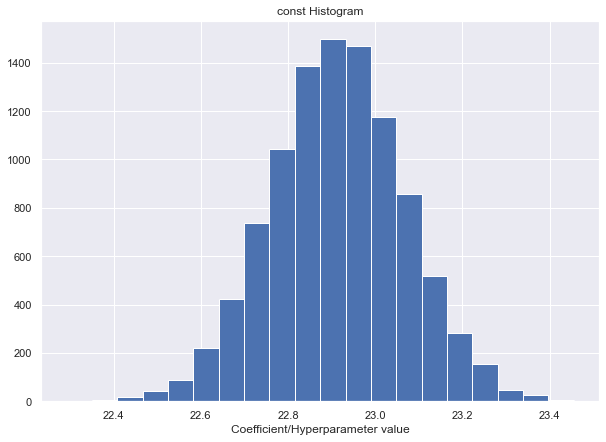

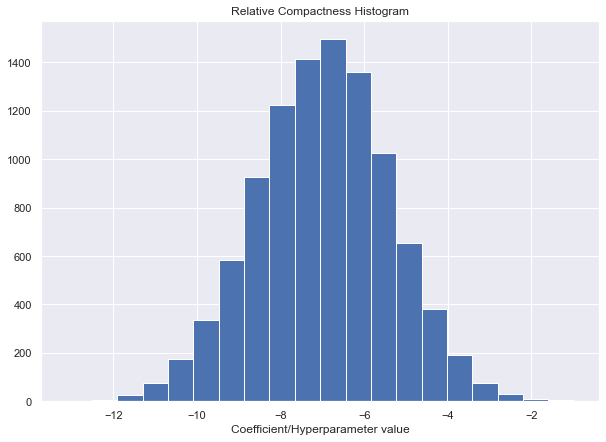

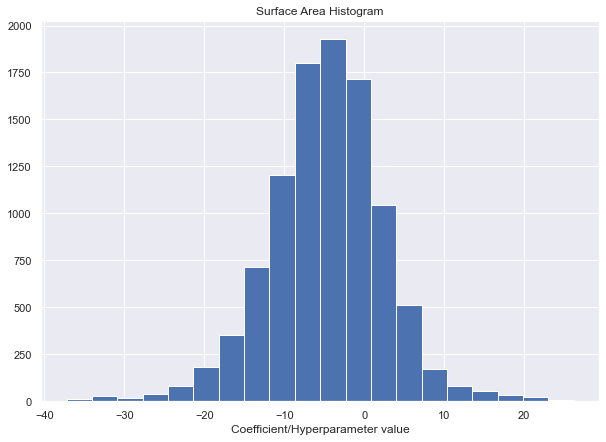

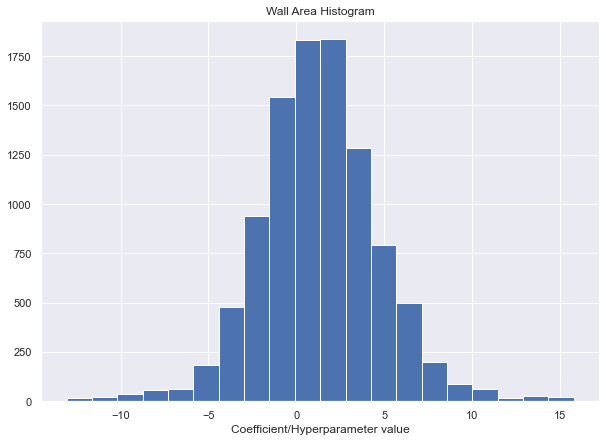

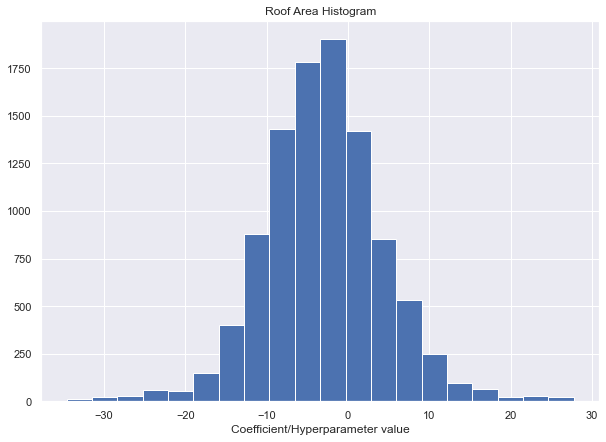

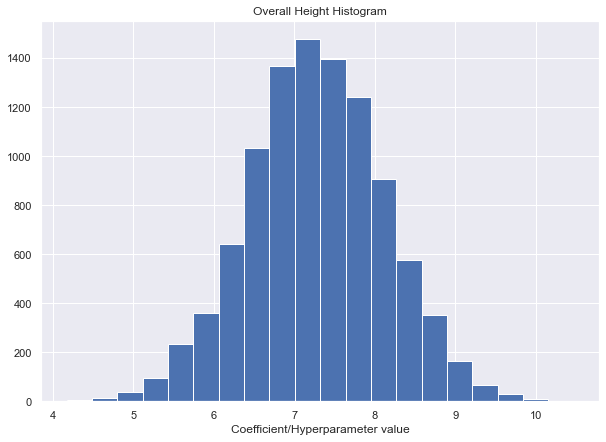

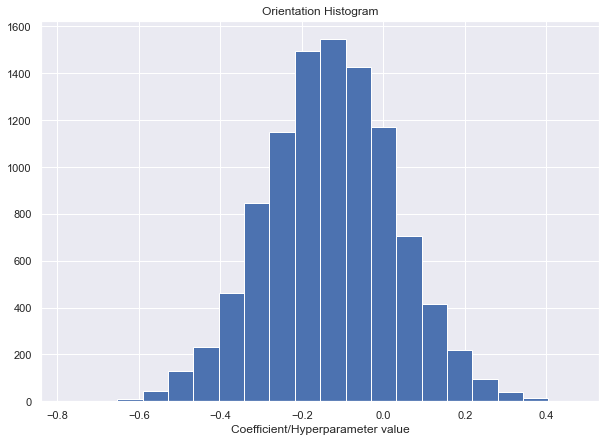

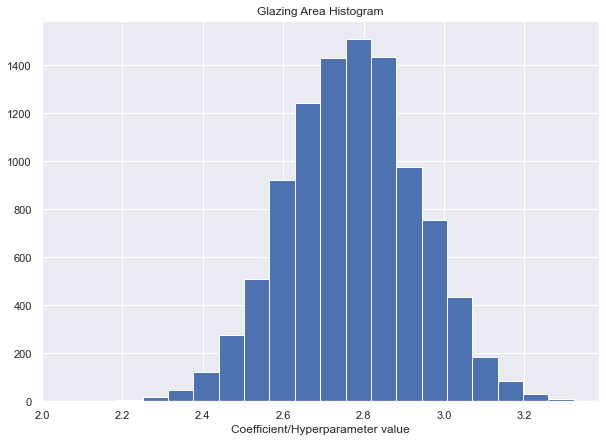

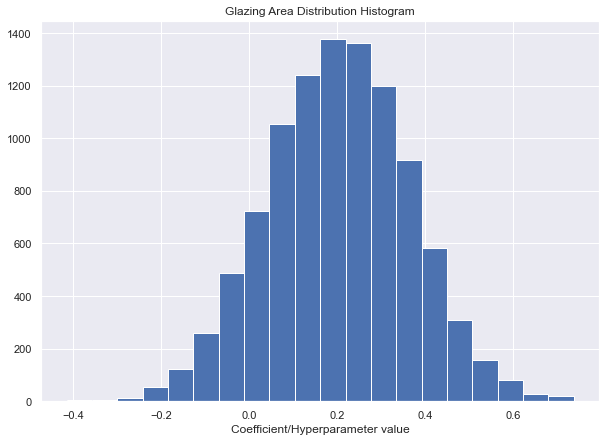

In [28]:
d = {0:"Alpha",1:"Beta"}
i = 2

for col in X_train_df.columns:
    d[i] = col
    i+=1

print("========== HISTOGRAMS ==========")

for i in range(11):
    plt.figure(figsize=(10,7))
    plt.hist(S[:,i],bins = 20)
    plt.title(d[i] + " Histogram")
    plt.xlabel("Coefficient/Hyperparameter value")
    plt.show()

# Task 6: Gaussian Processes

###  **(3 marks)**

There's no restriction on the GP implementation, you could either use the sklearn package or the Tensorflow style, the latter of which may receive extra bonus mark depending on the quality of implementation.  

You only need to calculate RMSE and plot supporting figures for your report. 

<font color=Red>  It is highly recommended that you impelment this part in a seperated file if your implementation contains too many extra libraries, as it may fool the auto-marker and incorrectly mark the rest of your notebook. 
<font>   
    
    


In [33]:
from sklearn.gaussian_process.kernels import DotProduct , Matern, RBF, WhiteKernel, ConstantKernel, RationalQuadratic, ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings('ignore')




ks = [RBF(), WhiteKernel(), ConstantKernel(), Matern(), RationalQuadratic(), ExpSineSquared(), DotProduct()]

ksl = ['RBF', 'White Kernel', 'Constant Kernel', 'Matern', 'Rational Quadratic', 'Exp Sine Squared', 'Dot Product']



stationary = [0, 3, 4, 5]

non_stationary = [1, 2, 6]



matr_rmse = np.zeros((len(stationary),len(non_stationary)))
matr_mae =np.zeros((len(stationary),len(non_stationary)))

print("####### MAE of each Kernel #######")
for i,x in enumerate(stationary):

    for j,y in enumerate(non_stationary):

        np.random.seed(seed=1)



        kernel = ks[x] * ks[y]



        gaussian_process = GaussianProcessRegressor(

            kernel=kernel,

            n_restarts_optimizer=9,

            normalize_y=True

            )

        gaussian_process.fit(X_train, y_train)

        y_pred_mean = gaussian_process.predict(X_test)

        rmse = np.sqrt(np.mean((y_pred_mean - y_test)**2))
        mae = mean_absolute_error(y_test,y_pred_mean)
        matr_rmse[i, j] = rmse
        matr_mae[i,j] = mae
        #print("####### RMSE #######")
        #print(f'{ksl[x]} * {ksl[y]} = {rmse}')
        #print("####### MAE #######")
        print(f'{ksl[x]} * {ksl[y]} = {mae}')

####### MAE of each Kernel #######
RBF * White Kernel = 9.279407145182292
RBF * Constant Kernel = 0.8213843405803862
RBF * Dot Product = 0.9764773821561948
Matern * White Kernel = 9.279407145182292
Matern * Constant Kernel = 0.595176206738362
Matern * Dot Product = 0.5952194726005066
Rational Quadratic * White Kernel = 9.279407145182292
Rational Quadratic * Constant Kernel = 0.6122563683514816
Rational Quadratic * Dot Product = 0.5806992445940616
Exp Sine Squared * White Kernel = 9.279407145182292
Exp Sine Squared * Constant Kernel = 9.279407145182292
Exp Sine Squared * Dot Product = 0.9764763800031687
